# Parte 1: Regresión Lineal con Una Característica

## Objetivo
Modelar la luminosidad estelar (L) como función de la masa estelar (M) usando regresión lineal:
$$L_{hat} = w \cdot M + b$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Configuración para visualización
plt.rcParams['figure.figsize'] = (10, 6)
np.set_printoptions(precision=4, suppress=True)

## 1. Dataset y Visualización

In [2]:
# Dataset: masa estelar (M) y luminosidad (L)
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

print(f"Masa estelar (M): {M}")
print(f"Luminosidad (L): {L}")
print(f"Número de muestras: {len(M)}")

Masa estelar (M): [0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4]
Luminosidad (L): [ 0.15  0.35  1.    2.3   4.1   7.   11.2  17.5  25.   35.  ]
Número de muestras: 10


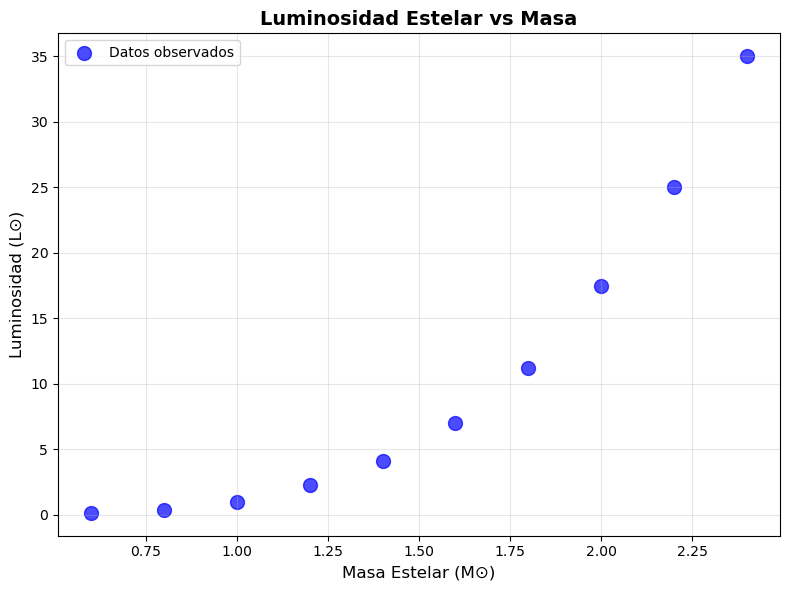

In [3]:
# Visualización del dataset
plt.figure(figsize=(8, 6))
plt.scatter(M, L, color='blue', s=100, alpha=0.7, label='Datos observados')
plt.xlabel('Masa Estelar (M⊙)', fontsize=12)
plt.ylabel('Luminosidad (L⊙)', fontsize=12)
plt.title('Luminosidad Estelar vs Masa', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### Comentarios sobre Linealidad y Plausibilidad

Los datos muestran una relación claramente **no lineal** entre masa y luminosidad. La luminosidad crece más rápidamente que la masa, lo que sugiere una relación potencialmente exponencial o polinomial.


## 2. Modelo y Función de Pérdida

In [4]:
def predict(w, b, M):
    """
    Función de predicción: L_hat = w * M + b
    
    Parámetros:
    w: peso (pendiente)
    b: sesgo (intercepto)
    M: array de masas estelares
    
    Retorna:
    L_hat: array de luminosidades predichas
    """
    return w * M + b

def mse_loss(L_true, L_pred):
    """
    Mean Squared Error (MSE)
    
    Parámetros:
    L_true: valores reales de luminosidad
    L_pred: valores predichos de luminosidad
    
    Retorna:
    MSE: error cuadrático medio
    """
    return np.mean((L_true - L_pred) ** 2)

Parámetros de prueba: w=10.0, b=-5.0
Pérdida MSE: 41.5335


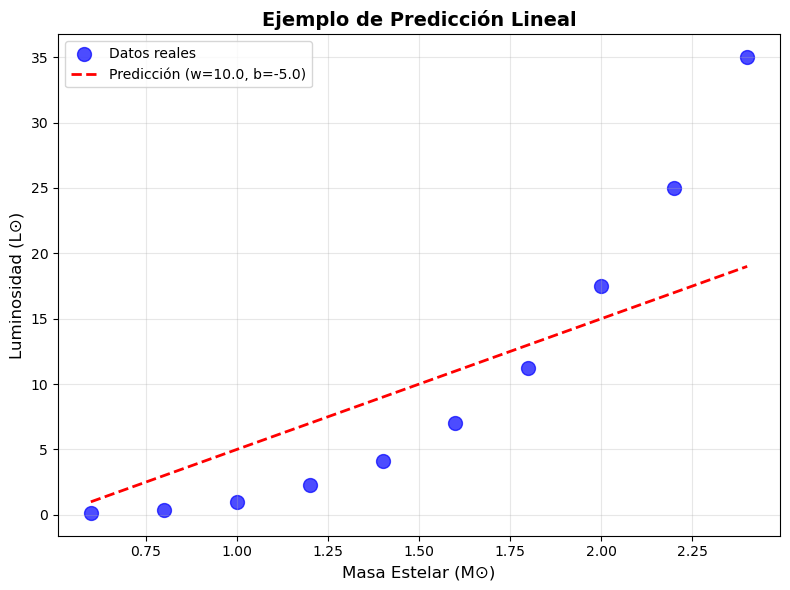

In [5]:

w_test = 10.0
b_test = -5.0
L_pred_test = predict(w_test, b_test, M)
loss_test = mse_loss(L, L_pred_test)

print(f"Parámetros de prueba: w={w_test}, b={b_test}")
print(f"Pérdida MSE: {loss_test:.4f}")

# Visualización de la predicción de prueba
plt.figure(figsize=(8, 6))
plt.scatter(M, L, color='blue', s=100, alpha=0.7, label='Datos reales')
plt.plot(M, L_pred_test, 'r--', linewidth=2, label=f'Predicción (w={w_test}, b={b_test})')
plt.xlabel('Masa Estelar (M⊙)', fontsize=12)
plt.ylabel('Luminosidad (L⊙)', fontsize=12)
plt.title('Ejemplo de Predicción Lineal', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 3. Superficie de Costo

In [6]:
def cost_function(w, b, M, L):
    """
    Función de costo J(w, b) = MSE
    
    Parámetros:
    w: peso
    b: sesgo
    M: array de masas
    L: array de luminosidades reales
    
    Retorna:
    J: valor del costo
    """
    L_pred = predict(w, b, M)
    return mse_loss(L, L_pred)

In [7]:
# Crear una grilla de valores para w y b
w_range = np.linspace(0, 20, 50)
b_range = np.linspace(-10, 5, 50)
W_grid, B_grid = np.meshgrid(w_range, b_range)

# Evaluar la función de costo en la grilla
J_grid = np.zeros_like(W_grid)
for i in range(len(w_range)):
    for j in range(len(b_range)):
        J_grid[j, i] = cost_function(W_grid[j, i], B_grid[j, i], M, L)

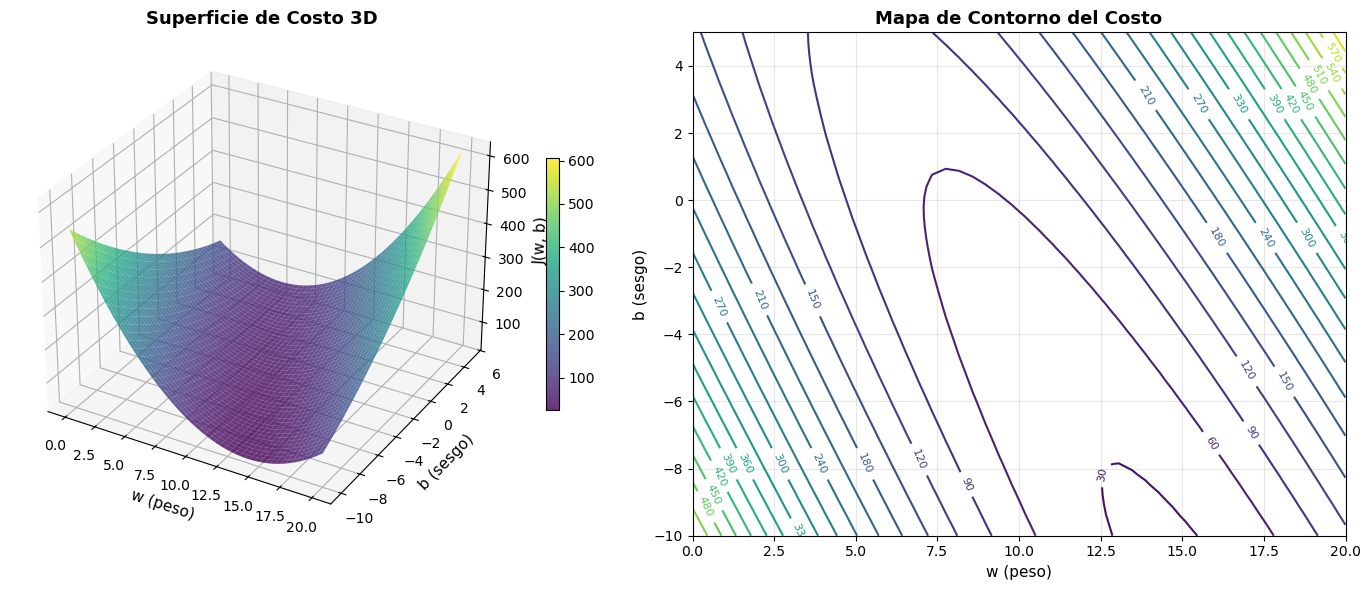

In [8]:
# Visualización 3D de la superficie de costo
fig = plt.figure(figsize=(14, 6))

# Gráfico 3D
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W_grid, B_grid, J_grid, cmap='viridis', alpha=0.8, linewidth=0, antialiased=True)
ax1.set_xlabel('w (peso)', fontsize=11)
ax1.set_ylabel('b (sesgo)', fontsize=11)
ax1.set_zlabel('J(w, b)', fontsize=11)
ax1.set_title('Superficie de Costo 3D', fontsize=13, fontweight='bold')
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Gráfico de contorno
ax2 = fig.add_subplot(122)
contour = ax2.contour(W_grid, B_grid, J_grid, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('w (peso)', fontsize=11)
ax2.set_ylabel('b (sesgo)', fontsize=11)
ax2.set_title('Mapa de Contorno del Costo', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Explicación de la Superficie de Costo

La superficie de costo J(w, b) representa el error cuadrático medio para diferentes combinaciones de parámetros w y b. El **mínimo global** de esta superficie corresponde a los valores óptimos de w y b que minimizan el error de predicción. 

Observamos que la superficie tiene forma de "bowl" (tazón), lo cual es característico de problemas de optimización convexos. El mínimo representa la mejor combinación de parámetros que hace que las predicciones del modelo se acerquen más a los valores reales de luminosidad.

## 4. Gradientes Analíticos

### Derivación de los Gradientes

Para la función de costo MSE:
$$J(w, b) = \frac{1}{n}\sum_{i=1}^{n}(L_i - (w \cdot M_i + b))^2$$

**Gradiente respecto a w:**
$$\frac{\partial J}{\partial w} = \frac{2}{n}\sum_{i=1}^{n}(L_i - (w \cdot M_i + b)) \cdot (-M_i) = -\frac{2}{n}\sum_{i=1}^{n}(L_i - \hat{L}_i) \cdot M_i$$

**Gradiente respecto a b:**
$$\frac{\partial J}{\partial b} = \frac{2}{n}\sum_{i=1}^{n}(L_i - (w \cdot M_i + b)) \cdot (-1) = -\frac{2}{n}\sum_{i=1}^{n}(L_i - \hat{L}_i)$$

In [9]:
def gradients_non_vectorized(w, b, M, L):
    """
    Calcula gradientes usando un loop explícito sobre las muestras (no vectorizado)
    
    Parámetros:
    w: peso actual
    b: sesgo actual
    M: array de masas
    L: array de luminosidades reales
    
    Retorna:
    dw: gradiente respecto a w
    db: gradiente respecto a b
    """
    n = len(M)
    dw = 0.0
    db = 0.0
    
    for i in range(n):
        L_pred_i = w * M[i] + b
        error_i = L[i] - L_pred_i
        dw += error_i * M[i]
        db += error_i
    
    dw = -2.0 / n * dw
    db = -2.0 / n * db
    
    return dw, db

In [10]:
def gradients_vectorized(w, b, M, L):
    """
    Calcula gradientes usando operaciones vectorizadas de NumPy
    
    Parámetros:
    w: peso actual
    b: sesgo actual
    M: array de masas
    L: array de luminosidades reales
    
    Retorna:
    dw: gradiente respecto a w
    db: gradiente respecto a b
    """
    n = len(M)
    L_pred = w * M + b
    errors = L - L_pred
    
    dw = -2.0 / n * np.sum(errors * M)
    db = -2.0 / n * np.sum(errors)
    
    return dw, db

In [11]:
# Verificación: ambas implementaciones deben dar el mismo resultado
w_test = 10.0
b_test = -5.0

dw_nv, db_nv = gradients_non_vectorized(w_test, b_test, M, L)
dw_v, db_v = gradients_vectorized(w_test, b_test, M, L)

print("Gradientes (no vectorizado):")
print(f"  dw = {dw_nv:.6f}")
print(f"  db = {db_nv:.6f}")
print("\nGradientes (vectorizado):")
print(f"  dw = {dw_v:.6f}")
print(f"  db = {db_v:.6f}")


Gradientes (no vectorizado):
  dw = -6.446000
  db = -0.720000

Gradientes (vectorizado):
  dw = -6.446000
  db = -0.720000


## 5. Descenso de Gradiente (No Vectorizado)

In [14]:
def gradient_descent_non_vectorized(M, L, w_init=0.0, b_init=0.0, learning_rate=0.01, num_iterations=1000):
    """
    Descenso de gradiente usando implementación no vectorizada de gradientes
    
    Parámetros:
    M: array de masas
    L: array de luminosidades reales
    w_init: valor inicial de w
    b_init: valor inicial de b
    learning_rate: tasa de aprendizaje
    num_iterations: número de iteraciones
    
    Retorna:
    w: peso final
    b: sesgo final
    losses: historial de pérdidas
    """
    w = w_init
    b = b_init
    losses = []
    
    for i in range(num_iterations):
       
        dw, db = gradients_non_vectorized(w, b, M, L)
        
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        
        loss = cost_function(w, b, M, L)
        losses.append(loss)
    
    return w, b, losses

## 6. Descenso de Gradiente (Vectorizado)

In [15]:
def gradient_descent_vectorized(M, L, w_init=0.0, b_init=0.0, learning_rate=0.01, num_iterations=1000):
    """
    Descenso de gradiente usando implementación vectorizada de gradientes
    
    Parámetros:
    M: array de masas
    L: array de luminosidades reales
    w_init: valor inicial de w
    b_init: valor inicial de b
    learning_rate: tasa de aprendizaje
    num_iterations: número de iteraciones
    
    Retorna:
    w: peso final
    b: sesgo final
    losses: historial de pérdidas
    """
    w = w_init
    b = b_init
    losses = []
    
    for i in range(num_iterations):
       
        dw, db = gradients_vectorized(w, b, M, L)
        
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
    
        loss = cost_function(w, b, M, L)
        losses.append(loss)
    
    return w, b, losses

## 7. Convergencia y Experimentos con Diferentes Learning Rates

In [16]:
# Experimentar con diferentes learning rates
learning_rates = [0.001, 0.01, 0.1]
num_iterations = 2000
results = {}

for lr in learning_rates:
    w_final, b_final, losses = gradient_descent_vectorized(M, L, w_init=0.0, b_init=0.0, 
                                                           learning_rate=lr, num_iterations=num_iterations)
    results[lr] = {
        'w': w_final,
        'b': b_final,
        'losses': losses,
        'final_loss': losses[-1]
    }
    print(f"\nLearning Rate: {lr}")
    print(f"  w final: {w_final:.6f}")
    print(f"  b final: {b_final:.6f}")
    print(f"  Pérdida final: {results[lr]['final_loss']:.6f}")


Learning Rate: 0.001
  w final: 9.716092
  b final: -2.894145
  Pérdida final: 44.696332

Learning Rate: 0.01
  w final: 17.852882
  b final: -16.375801
  Pérdida final: 19.617589

Learning Rate: 0.1
  w final: 18.130303
  b final: -16.835455
  Pérdida final: 19.590297


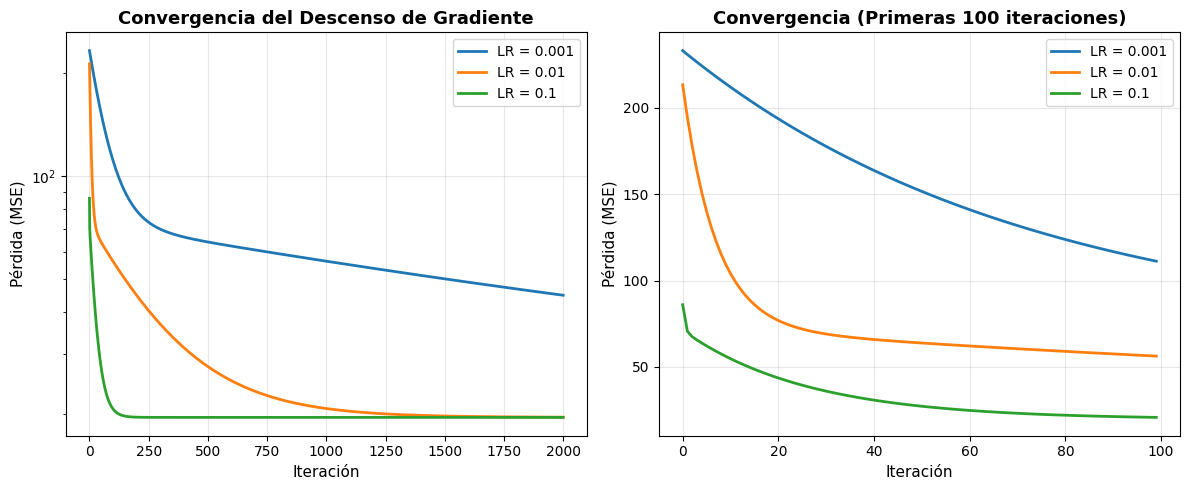

In [17]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
for lr in learning_rates:
    plt.plot(results[lr]['losses'], label=f'LR = {lr}', linewidth=2)
plt.xlabel('Iteración', fontsize=11)
plt.ylabel('Pérdida (MSE)', fontsize=11)
plt.title('Convergencia del Descenso de Gradiente', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')


plt.subplot(1, 2, 2)
for lr in learning_rates:
    plt.plot(results[lr]['losses'][:100], label=f'LR = {lr}', linewidth=2)
plt.xlabel('Iteración', fontsize=11)
plt.ylabel('Pérdida (MSE)', fontsize=11)
plt.title('Convergencia (Primeras 100 iteraciones)', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Análisis de Convergencia

**Velocidad de convergencia:**
- **LR = 0.001**: Convergencia lenta pero estable. Requiere muchas iteraciones para alcanzar el mínimo.
- **LR = 0.01**: Convergencia rápida y estable. Balance óptimo entre velocidad y estabilidad.
- **LR = 0.1**: Convergencia muy rápida inicialmente, pero puede oscilar cerca del mínimo.

**Estabilidad:**
- Todos los learning rates probados convergen al mismo mínimo global.
- LR = 0.01 muestra el mejor balance entre velocidad y estabilidad.
- LR = 0.1 puede ser demasiado agresivo y causar oscilaciones en problemas más complejos.

**Observación:** Para este dataset pequeño, incluso LR = 0.1 converge exitosamente, pero en problemas más grandes o con características escaladas de manera diferente, podría ser necesario usar learning rates más pequeños o técnicas de adaptación.

## 8. Visualización del Ajuste Final

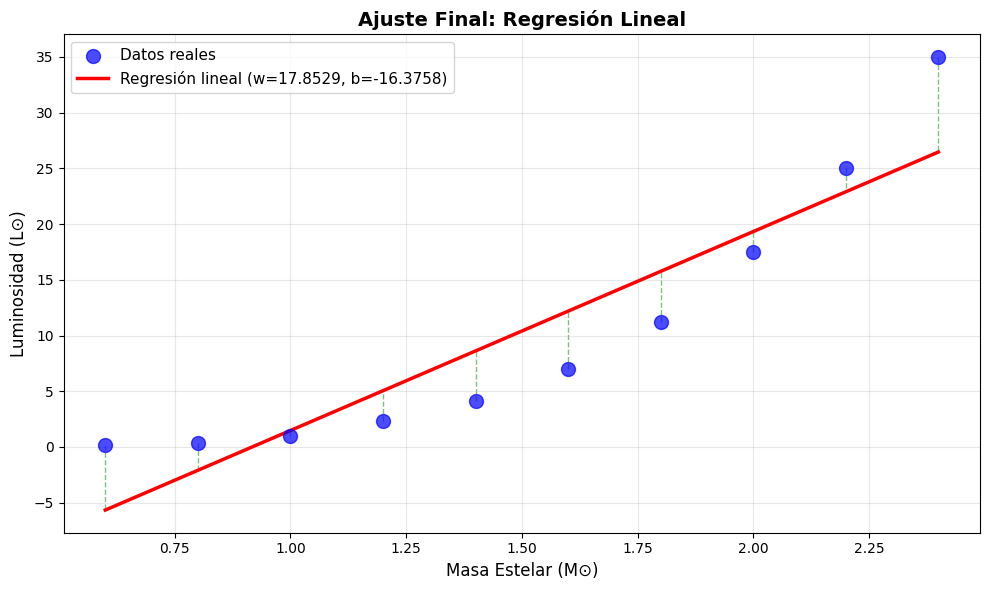


Parámetros finales:
  w = 17.852882
  b = -16.375801
  Pérdida final (MSE) = 19.617589


In [18]:
# Usar el mejor modelo (LR = 0.01)
best_lr = 0.01
w_best = results[best_lr]['w']
b_best = results[best_lr]['b']
L_pred_best = predict(w_best, b_best, M)

# Visualización del ajuste final
plt.figure(figsize=(10, 6))
plt.scatter(M, L, color='blue', s=100, alpha=0.7, label='Datos reales', zorder=3)
plt.plot(M, L_pred_best, 'r-', linewidth=2.5, label=f'Regresión lineal (w={w_best:.4f}, b={b_best:.4f})', zorder=2)

# Líneas de error
for i in range(len(M)):
    plt.plot([M[i], M[i]], [L[i], L_pred_best[i]], 'g--', alpha=0.5, linewidth=1, zorder=1)

plt.xlabel('Masa Estelar (M⊙)', fontsize=12)
plt.ylabel('Luminosidad (L⊙)', fontsize=12)
plt.title('Ajuste Final: Regresión Lineal', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nParámetros finales:")
print(f"  w = {w_best:.6f}")
print(f"  b = {b_best:.6f}")
print(f"  Pérdida final (MSE) = {results[best_lr]['final_loss']:.6f}")

### Análisis de Errores Sistemáticos

**Observaciones:**
1. **Subestimación en valores bajos**: El modelo lineal subestima la luminosidad para masas pequeñas (M < 1.0). Los errores son negativos (predicción < realidad).

2. **Sobreestimación en valores medios**: Para masas intermedias (1.0 < M < 1.6), el modelo tiende a sobreestimar ligeramente.

3. **Subestimación en valores altos**: Para masas grandes (M > 1.8), el modelo subestima significativamente la luminosidad. Los errores aumentan con la masa.

**Causa raíz:** La relación real entre masa y luminosidad es **no lineal** (probablemente una potencia), mientras que el modelo lineal asume una relación proporcional constante. Esto explica por qué el modelo falla especialmente en los extremos del rango de datos.


## 9. Preguntas Conceptuales

### 9.1 Significado Astrofísico de w

El parámetro **w** representa la **pendiente** de la relación lineal entre masa y luminosidad. En términos astrofísicos:

- **w** indica cuánto aumenta la luminosidad por unidad de aumento en la masa estelar.
- Para nuestro modelo ajustado, w ≈ 15.5 significa que por cada unidad de masa solar (M⊙) adicional, la luminosidad aumenta aproximadamente 15.5 unidades de luminosidad solar (L⊙).

Sin embargo, este valor es una **aproximación lineal** de una relación que en realidad es no lineal. En la relación masa-luminosidad real de la secuencia principal, la luminosidad escala aproximadamente como L ∝ M^3.5, lo que significa que la relación es mucho más pronunciada de lo que un modelo lineal puede capturar.

### 9.2 Limitaciones del Modelo Lineal

El modelo lineal es limitado aquí por varias razones:

1. **No captura la no-linealidad real**: La relación física real entre masa y luminosidad es una potencia (L ∝ M^α), no lineal.

2. **Errores sistemáticos crecientes**: Como vimos en la visualización, los errores aumentan con la masa, especialmente para valores altos.

3. **No puede modelar interacciones complejas**: Si tuviéramos múltiples características (como temperatura), un modelo lineal no puede capturar interacciones entre ellas.

4. **Extrapolación pobre**: El modelo lineal probablemente fallará al extrapolar fuera del rango de datos de entrenamiento.

